<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Intro to Basic Probability and Statistics: Likelihood Functions and Estimation.</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 480A5, Spring 2025
Instructor: Brian Munsky
Authors: Huy Vo, Ania Baetica, Kaan Öcal, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# **Learning Objectives**
After completing this notebook, you will be able to:
- Describe the concept of likelihood functions
- Describe how likelihood functions are used in statistical inference.
- Plot likelihood functions for different statistical models.
- Describe the concept of maximum likelihood estimation.
- Calculate the maximum likelihood estimate for a given likelihood function.
- Describe the concept of confidence intervals.
- Calculate confidence intervals for a different likelihood functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from scipy.optimize import minimize

In [2]:
# Make sure that the user is usig the currect working directory
import os
path = os.getcwd()
# Get the folder name
folder = os.path.basename(path)

print('Checking current directory...')
if folder == 'Module3-Statistics':
    print(f'You are currently in the correct directory: {folder}')
elif folder == '480A5CourseMaterials':
    os.chdir('Module3-Statistics')
    print('Changed to Module3-Statistics directory')
else:
    print('You are in the wrong directory. Navigate to the Module3-Statistics directory and try again')

Checking current directory...
You are currently in the correct directory: Module3-Statistics


# **1. Likelihood functions**

**Likelihood functions** serve as fundamental tools for quantifying the plausibility of different parameter values given observed data. Likelihood functions form the backbone of various statistical methods, including **maximum likelihood estimation** (MLE), **Bayesian inference**, and **hypothesis testing**.

Likelihood functions provide a formal framework for evaluating how well different parameter values explain the observed data. By assessing the likelihood of observing the data under different parameter settings, we can infer the most plausible values for the parameters governing the underlying statistical model. This process of parameter estimation is essential for making predictions, testing hypotheses, and understanding the underlying mechanisms driving observed phenomena.

In this introduction, we will explore the concept of likelihood functions, their role in parameter estimation, and their practical applications in statistical analysis. We will delve into the principles of maximum likelihood estimation, which seeks to find the parameter values that maximize the likelihood function. Later in the course, we will also explore Bayesian inference, which incorporates prior knowledge about the parameters into the estimation process. 

Additionally, we will discuss the importance of likelihood-based approaches in biology and medicine.


## **1.A. Definition of Likelihood function**
The likelihood function is a fundamental concept in statistical inference that quantifies the plausibility of different parameter values given observed data. Let $\theta$ denote the parameter of interest in a statistical model, and let ($x_1, x_2, \ldots, x_n$) represent a sample of $n$ random variables sampled from the population. 

The likelihood function, denoted by  $L(\theta) \equiv L(\theta | x_1, x_2, \ldots, x_n) = \text{Prob}(x_1, x_2, \ldots, x_n | \theta ) $, is defined as the joint probability density function (PDF) or probability mass function (PMF) of the observed data when considered as a function of the parameter $\theta$. 

Under the assumption of that  ($x_1, x_2, \ldots, x_n$) are **independent and identically distributed** (i.i.d.) random variables, then the likelihood can be expressed:

$L(\theta) = \prod_{i=1}^n \text{Prob}(x_i|\theta)$

When dealing with products of many numbers, it is common practice to describe likelihood functions in terms of their logarthms:

$\log L(\theta) = \sum_{i=1}^n \log \text{Prob}(x_i|\theta)$

The likelihood function provides a measure of how well different parameter values explain the observed data. Intuitively, parameter values that result in a higher likelihood are considered more plausible given the observed data. Therefore, the likelihood function forms the basis for parameter estimation techniques such as maximum likelihood estimation (MLE) and Bayesian inference.


## **1.B Gaussian Example**

Let $X_1, X_2, \ldots, X_n$ be a sample of $n$ independent and identically distributed random variables from a Gaussian (normal) distribution with mean $\mu$ and variance $\sigma^2$. The probability density function (PDF) of a single observation $X_i$ is given by:

$$
f(x_i \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

The likelihood function for the entire sample, denoted $L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n)$, is the product of the PDFs of the individual observations, since the observations are independent. Therefore, the likelihood function is given by:

$$
L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \prod_{i=1}^{n} f(x_i \mid \mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right)
$$

To simplify calculations and avoid numerical underflow or overflow, it's common practice to work with the logarithm of the likelihood function. Taking the logarithm of both sides of the likelihood function yields:

$$
\log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
$$

$$
= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

This logarithm of the likelihood function is often used in practice for parameter estimation using maximum likelihood estimation (MLE) or Bayesian inference.


### **1.B.1. Estimating the MLE by plotting the likelihood function.**

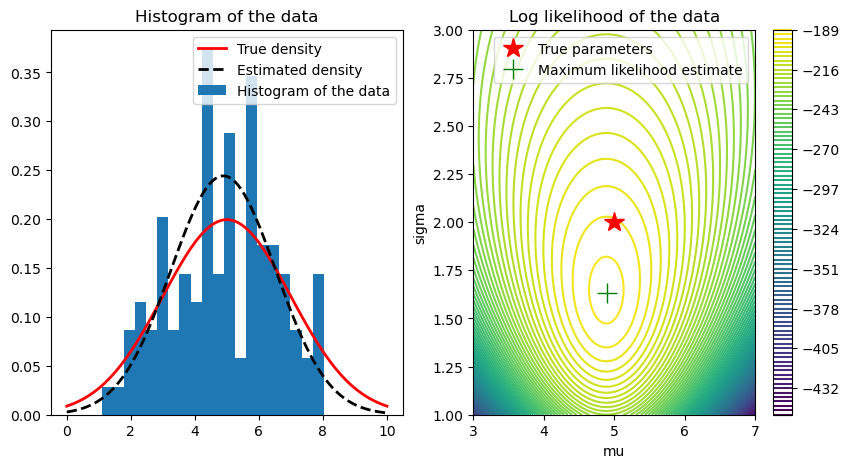

True mu:  5
True sigma:  2
Estimated mu (via plotting):  4.889447236180905
Estimated sigma: (via plotting) 1.6331658291457285
Sample mean:  4.885952176416354
Sample standard deviation:  1.632142437673733


In [3]:
# Example of maximum likelihood estimation for gaussian distribution

# Generate some random data
# np.random.seed(0)
true_mu = 5
true_sigma = 2
N = 100
data = np.random.normal(true_mu, true_sigma, N)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Define a function to compute the log likelihood of the data given a mean and standard deviation
def log_likelihood(data, mu, sigma):
    return np.sum(stats.norm.logpdf(data, mu, sigma))

# Make a contour plot of the log likelihood function vs. mu and sigma
mu_vals = np.linspace(3, 7, 200)
sigma_vals = np.linspace(1, 3, 200)
mu_grid, sigma_grid = np.meshgrid(mu_vals, sigma_vals)
log_likelihood_grid = np.zeros(mu_grid.shape)
for i in range(mu_vals.size):
    for j in range(sigma_vals.size):
        log_likelihood_grid[j, i] = log_likelihood(data, mu_vals[i], sigma_vals[j])

cbar = ax[1].contour(mu_grid, sigma_grid, log_likelihood_grid, 100)
# Place a star at the true mu and sigma
ax[1].plot(true_mu, true_sigma, 'r*', markersize=15)
# Place crosshairs at the maximum likelihood estimate
max_likelihood_idx = np.unravel_index(np.argmax(log_likelihood_grid), log_likelihood_grid.shape)
ax[1].plot(mu_vals[max_likelihood_idx[1]], sigma_vals[max_likelihood_idx[0]], 'g+', markersize=15)

# Add a colorbar and labels
fig.colorbar(cbar, ax=ax[1])
ax[1].set_xlabel('mu')
ax[1].set_ylabel('sigma')
ax[1].set_title('Log likelihood of the data')
ax[1].legend(['True parameters', 'Maximum likelihood estimate'])

# Plot a histogram of the data
ax[0].hist(data, bins=20, density=True)
ax[0].set_title('Histogram of the data')
# add the true density
x = np.linspace(0, 10, 100)
ax[0].plot(x, stats.norm.pdf(x, true_mu, true_sigma), 'r', linewidth=2)
ax[0].legend(['True density', 'Histogram of the data'])
# Add the estimated density to the histogram in ax[0]
ax[0].plot(x, stats.norm.pdf(x, mu_vals[max_likelihood_idx[1]], sigma_vals[max_likelihood_idx[0]]), 'k--', linewidth=2)
ax[0].legend(['True density', 'Estimated density', 'Histogram of the data'])
plt.show()

# Print the true and estimated parameters
print('True mu: ', true_mu)
print('True sigma: ', true_sigma)
print('Estimated mu (via plotting): ', mu_vals[max_likelihood_idx[1]])
print('Estimated sigma: (via plotting)', sigma_vals[max_likelihood_idx[0]])

# Print the sample mean and standard deviation
print('Sample mean: ', np.mean(data))
print('Sample standard deviation: ', np.std(data, ddof=0))

### **1.B.2. Estimating the MLE through an optimization search.**

In [4]:
# Now, let's use an optimization algorithm to find the maximum likelihood estimate

# Define a function to compute the negative log likelihood for each set of parameters
def neg_log_likelihood(params, data):
    mu, sigma = params
    # Return the minus log likelihood (which we will want to minimize)
    return -np.sum(stats.norm.logpdf(data, mu, sigma))

# Use the minimize function to find the maximum likelihood estimate
result = minimize(neg_log_likelihood, [3, 3], args=(data,))

# Now let's compare the results to the previous estimate
# Print the true and estimated parameters
print('True mu: ', true_mu)
print('True sigma: ', true_sigma)
print('Estimated mu (via plotting): ', mu_vals[max_likelihood_idx[1]])
print('Estimated sigma: (via plotting)', sigma_vals[max_likelihood_idx[0]])
print('Estimated mu (via optimization): ', result.x[0])
print('Estimated sigma (via optimization): ', result.x[1])

# Print the sample mean and standard deviation
print('Sample mean: ', np.mean(data))
print('Sample standard deviation: ', np.std(data, ddof=0))

True mu:  5
True sigma:  2
Estimated mu (via plotting):  4.889447236180905
Estimated sigma: (via plotting) 1.6331658291457285
Estimated mu (via optimization):  1584.7978510991993
Estimated sigma (via optimization):  -5300.130968267593
Sample mean:  4.885952176416354
Sample standard deviation:  1.632142437673733


### **1.B.3. Estimation using builtin functions within numpy:**

In [5]:
# Now let's use the built-in function to compute the maximum likelihood estimate
mu, sigma = stats.norm.fit(data)
print('Estimated mu (via built-in function): ', mu)
print('Estimated sigma (via built-in function): ', sigma)

Estimated mu (via built-in function):  4.885952176416354
Estimated sigma (via built-in function):  1.632142437673733


Notice that the optimization and builtin routines gave us a result that was **very** close to the sample mean and sample variance.  That wasn't just a coincidence...

### **1.B.4. Analytical Calculation of the MLE for Gaussian Distribution**
To find the maximum likelihood estimators (MLEs) for $\mu$ and $\sigma^2$, we maximize the likelihood function with respect to these parameters. Taking the logarithm of the likelihood function, we have:

$$
\log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \sum_{i=1}^{n} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(x_i - \mu)^2}{2\sigma^2}\right) \right)
$$

$$
= -\frac{n}{2} \log(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (x_i - \mu)^2
$$

To find the MLE for $\mu$, we differentiate the logarithm of the likelihood function with respect to $\mu$ and set it equal to zero:

$$
\frac{\partial}{\partial \mu} \log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = \frac{1}{\sigma^2} \sum_{i=1}^{n} (x_i - \mu) = 0
$$

Solving for $\mu$, we find:

$$
\hat{\mu}_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} x_i = \bar{x}
$$

which is the sample mean.

To find the MLE for $\sigma^2$, we differentiate the logarithm of the likelihood function with respect to $\sigma^2$ and set it equal to zero:

$$
\frac{\partial}{\partial \sigma^2} \log L(\mu, \sigma^2 \mid x_1, x_2, \ldots, x_n) = -\frac{n}{2\sigma^2} + \frac{1}{2(\sigma^2)^2} \sum_{i=1}^{n} (x_i - \mu)^2 = 0
$$

Solving for $\sigma^2$, we find:

$$
\hat{\sigma}^2_{\text{MLE}} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 = s^2
$$

which is the sample variance.

**Therefore, the maximum likelihood estimators (MLEs) for the mean and standard deviation of a Gaussian distribution are the sample mean $\bar{x}$ and the sample standard deviation $s$, respectively.**  These are very easy to compute as we have seen earlier!


#### **Practice MLE estimation on your own:**
1) Generate five different random data sets from five different distributions (normal, beta, log-normal, gamma, t)
2) Compute the likelihood of each data set assuming a model with each of the five different distributions.
3) Optimize the parameters of for each combination of data and distributions (5 x 5 = 25 total optimizations).
4) Make a table to present the MLE log-likelihood versus model for each combination.
5) Comment on whether or not you could identify which data set came from which model

# **2. Confidence Intervals**

In most situations, a simple point estimate of some parameters is not sufficient.  We also need to know how accurate or trustworthy is that estimation.  This is the job of **Confidence Intervals**.

Basically, a confidence interval is a region of parameter space that is typically expected to contain the true parameters that you are trying to estimate. For example, if you estimated the interval at a confidence level of $\alpha = 95\%$, then you would expect that interval to contain the correct parameters set 95% of the time.

It is important to note that the confidence interval is random because it depends on the data that you have collected. Also, because the calculation of the confidence depends on assumptions about the distribution of the data, the confidence interval will only be as good as the assumptions that you make.

## **2.A. Mathematical Definition of Confidence Intervals.**

To be a little more precise, let $X$ be a random sample from a probability distribution, $P$ that you wish to estimate.  Assume that $P$ depends on some parameters (e.g., $\theta$) that you want to know.  We not only want to find $\theta$, but we also want to know its confidence interval at some level, $\alpha$ (e.g., 95%). That is, we would like to find an interval ($a(X),b(X)$), where $a(X)$ and $b(X)$ are variables depending on the random data, and we want them to satisfy the relationship,
$$ P(a(X) < \theta < b(X)) = \alpha, \text{ for every }\theta. $$

## **2.B. Estimating confidence intervals of Gaussian-distributed data.**

For common distributions, the confidence intervals for the mean and standard deviation can be computed using known routines.

For example, when computing the confidence interval for the mean of a Normal distribution, if we know the true standard deviation ($\sigma$) in advance, we can use the formula:
$$ CI = [\mu - z \sigma / \sqrt{N}, \mu + z \sigma / \sqrt{N}] $$
where $z$ is the z-score for the desired confidence level (e.g., 1.96 for 95% confidence) and $N$ is the number of samples.

If we don't know the true standard deviation, we can use the sample standard deviation to estimate it:
$$ CI = [\mu - t s / \sqrt{N}, \mu + t s / \sqrt{N}] $$
where $t$ is the t-score for the desired confidence level and $s$ is the sample standard deviation.

To estimate the confidence interval for the standard deviation of a Normal distribution, we can use the formula:
$$ CI = [s \sqrt{N-1} / \chi_{\alpha/2}^2, s \sqrt{N-1} / \chi_{1-\alpha/2}^2] $$
where $\chi_{\alpha/2}^2$ and $\chi_{1-\alpha/2}^2$ are the chi-squared values for the desired confidence level.

Let's write a function to calculate the confidence interval for the mean and standard deviation of a Normal distribution using these formulas.

In [6]:
def compute_confidence_intervals_gaussian(data, alpha=0.05, method='t'):
    # Compute the confidence intervals for the mean and standard deviation
    #
    # This function computes the confidence intervals for the mean and standard deviation of data
    # that is assumed to be drawn from a Gaussian distribution. The confidence intervals for the mean
    # are computed either using the t-distribution or the normal distribution, depending on the method
    # argument. The confidence intervals for the standard deviation are computed using the chi-squared
    # distribution.
    #
    # Parameters:
    # data: an array of data values
    # alpha: the confidence level (default is 0.05)
    # method: the method to use for computing the confidence interval for the mean ('t' or 'normal')
    #
    # Returns:
    # ci_95_mu: a tuple containing the lower and upper bounds of the confidence interval for the mean
    # ci_95_sigma: a tuple containing the lower and upper bounds of the confidence interval for the standard deviation
    
    # Compute the number of data points
    N = len(data)

    if method == 't':
        # Compute the critical value for a 1-alpha confidence interval using the t-distribution
        t_critical = stats.t.ppf(1-alpha/2, df=N-1)
        margin_of_error = t_critical * np.std(data, ddof=1) / np.sqrt(N)
        # Compute the 95% confidence interval for the mean using the t-distribution
        ci_95_mu = (np.mean(data) - margin_of_error, 
                    np.mean(data) + margin_of_error)
    elif method == 'normal':
        # Compute the critical value for a 1-alpha confidence interval using the normal distribution
        z_critical = stats.norm.ppf(1-alpha/2)
        margin_of_error = z_critical * np.std(data, ddof=1) / np.sqrt(N)
        # Compute the 95% confidence interval for the mean using the normal distribution
        ci_95_mu = (np.mean(data) - margin_of_error, 
                    np.mean(data) + margin_of_error)
    else:
        raise ValueError('Invalid method. Must be "t" or "normal"')
    
    # Compute the chi-squared values for a 95% confidence interval
    chi2_val_upper = stats.chi2.ppf(1-alpha/2, df = N - 1)
    chi2_val_lower = stats.chi2.ppf(alpha/2, df = N - 1)
    # Compute the 95% confidence interval for the standard deviation
    ci_95_sigma = (np.std(data, ddof=1)*np.sqrt((N-1) / chi2_val_upper),
                    np.std(data, ddof=1)*np.sqrt((N-1) / chi2_val_lower))
    return ci_95_mu, ci_95_sigma

# Compute the confidence intervals using the normal distribution method
ci_95_mu, ci_95_sigma = compute_confidence_intervals_gaussian(data, method='normal')
print('95% confidence interval for the mean (normal method): ', ci_95_mu)

# Compute the confidence intervals using the t-distribution method
ci_95_mu, ci_95_sigma = compute_confidence_intervals_gaussian(data, method='t')
print('95% confidence interval for the mean (t method): ', ci_95_mu)
print('95% confidence interval for the standard deviation: ', ci_95_sigma)

95% confidence interval for the mean (normal method):  (4.564446569794596, 5.207457783038112)
95% confidence interval for the mean (t method):  (4.560468198294338, 5.2114361545383705)
95% confidence interval for the standard deviation:  (1.4402515846018047, 1.9055712788448473)


## **2.C. Checking the success rate of the confidence interval estimations**

To illustrate the meaning of our confidence interval estimation, let's perform a simulation study. We will generate random samples from many Normal distributions with known means and standard deviations and then calculate the confidence intervals for the mean and standard deviation using the formulas above. For each simulation, we will record whether the true mean and standard deviation fall within the calculated confidence intervals. By repeating this process multiple times, we can assess the coverage probability of the confidence intervals, which should be close to the specified confidence level (e.g., 95%).

In [7]:
samples_per_experiment = 100
n_experiments = 10000

# Initialize arrays to store the results
true_mus = np.zeros(n_experiments)
true_sigmas = np.zeros(n_experiments)
mu_estimates = np.zeros(n_experiments)
sigma_estimates = np.zeros(n_experiments)
mu_ci_normal = np.zeros((n_experiments, 2))
mu_ci_t = np.zeros((n_experiments, 2))
sigma_ci = np.zeros((n_experiments, 2))

for i in range(n_experiments):
    # Generate some random data
    true_mu = np.random.uniform(0, 10)
    true_sigma = np.random.uniform(1, 5)
    expt_data = np.random.normal(true_mu, true_sigma, samples_per_experiment)
    
    # Record the true mean and standard deviation
    true_mus[i] = true_mu
    true_sigmas[i] = true_sigma
    
    # Compute and record the confidence intervals using the normal method
    ci_95_mu, ci_95_sigma = compute_confidence_intervals_gaussian(expt_data, method='normal')
    mu_ci_normal[i] = ci_95_mu
    sigma_ci[i] = ci_95_sigma
    
    # Compute the confidence intervals using the t method
    ci_95_mu, ci_95_sigma = compute_confidence_intervals_gaussian(expt_data, method='t')
    mu_ci_t[i] = ci_95_mu

# Compute the coverage probabilities
mu_normal_coverage = np.mean((true_mus >= mu_ci_normal[:, 0]) & (true_mus <= mu_ci_normal[:, 1]))
mu_t_coverage = np.mean((true_mus >= mu_ci_t[:, 0]) & (true_mus <= mu_ci_t[:, 1]))
sigma_coverage = np.mean((true_sigmas >= sigma_ci[:, 0]) & (true_sigmas <= sigma_ci[:, 1]))

print('Coverage probability for the mean (normal method): ', mu_normal_coverage)
print('Coverage probability for the mean (t method): ', mu_t_coverage)
print('Coverage probability for the standard deviation: ', sigma_coverage)

# This could take a minute to run depending on the number of experiments and samples per experiment.

Coverage probability for the mean (normal method):  0.9473
Coverage probability for the mean (t method):  0.9503
Coverage probability for the standard deviation:  0.9507


When you run the above code, you should see that the coverage probability of the confidence intervals is close to the specified confidence level (e.g., 95%). This indicates that the confidence intervals are correctly estimating the true parameters of the Normal distribution with the desired confidence level.

Try it with different sample sizes and see how it works.  When the sample size is small (e.g., $\leq 10$), the estimate of the standard deviation is not very good, and the coverage probability using the Normal method is not as close to the desired confidence level, but the t-method is still good.

## **2.D. Estimating confidence intervals using the bootstrap method.**

A common and more general approach to estimate confidence intervals is to use the **bootstrap method**. In this method, we resample the data with replacement many times, and compute the maximum likelihood estimate for each resampled data set. We can then use the percentiles of the estimates to compute the confidence intervals.

The advantage of the bootstrap method is that it can be used for any distribution, not just the common ones for which known functions are available.

**Limitations**. Some limitations of the bootstrap method are that it can be computationally expensive, and it may not work well for small data sets. However, it can be a useful tool for estimating confidence intervals when the distribution of the maximum likelihood estimates is not well approximated by a normal distribution.

In [8]:
# Now let's use the bootstrap to compute confidence intervals for the mean and standard deviation
# for our previous data set. We will use 1000 bootstrap samples to generate the confidence intervals.

# Define a function to compute the mean and standard deviation of a bootstrap sample
def bootstrap_mean_std(data):
    bootstrap_sample = np.random.choice(data, size=data.size, replace=True)
    return np.mean(bootstrap_sample), np.std(bootstrap_sample, ddof=1)

# Generate 1000 bootstrap samples
n_bootstrap = 10000
bootstrap_means = np.zeros(n_bootstrap)
bootstrap_stds = np.zeros(n_bootstrap)
for i in range(n_bootstrap):
    bootstrap_means[i], bootstrap_stds[i] = bootstrap_mean_std(data)

# Compute the 95% confidence interval for the mean
ci_95_mu_bootstrap = np.percentile(bootstrap_means, [2.5, 97.5])
# Compute the 95% confidence interval for the standard deviation
ci_95_sigma_bootstrap = np.percentile(bootstrap_stds, [2.5, 97.5])

# Print the results and compare to the previous results
print('95% confidence interval for the mean (bootstrap): ', ci_95_mu_bootstrap)
print('95% confidence interval for the standard deviation (bootstrap): ', ci_95_sigma_bootstrap)
print('95% confidence interval for the mean (analytical): ', ci_95_mu)
print('95% confidence interval for the standard deviation (analytical): ', ci_95_sigma)


95% confidence interval for the mean (bootstrap):  [4.5703366  5.19524209]
95% confidence interval for the standard deviation (bootstrap):  [1.44546812 1.81308494]
95% confidence interval for the mean (analytical):  (4.458418694693995, 5.95129016158104)
95% confidence interval for the standard deviation (analytical):  (3.302943678205968, 4.37006608853799)


## **2.E. Practice working with confidence intervals.**
1) Generate five different random data sets from five different distributions (normal, beta, log-normal, gamma, t)
2) Use the bootstrapping approach to estimate the confidence intervals.
3) (Optional) Look online or in the NumPy documentation to see if there are any built-in functions that can help you estimate the confidence intervals for these distributions.

# **3. Summary and Conclusions**

Likelihood functions, parameter estimation, and confidence intervals are fundamental concepts in statistical inference. 

* **Likelihood functions** quantify the probability of observing a given set of data for different values of model parameters. 
* **Parameter estimation** involves finding the most likely values of model parameters that maximize the likelihood function, often using techniques like maximum likelihood estimation (MLE). 
* **Confidence intervals** provide a range of plausible values for model parameters, indicating the uncertainty associated with the estimation process (remember, this is not the same as telling you the uncertainty of your particular estimate). 

While these methods are widely used and provide valuable insights into the underlying data generation process, they also have **limitations**. 
* Likelihood functions, as we computed them above, assume that the data are **independent and identically distributed** (i.i.d.), which may not always hold in practice. This can be fixed with more complex multi-variate models, but it requires more work.
* Confidence intervals are based on **frequentist statistics** and do not directly account for prior knowledge or uncertainty in model parameters.  Science is not done in a vacuum, and this prior knowledge can be extremely valuable (we will address this limitation with  Bayesian estimation methods later in the course). 